<a href="https://colab.research.google.com/github/keinerfan/CIAP1/blob/CODES/morgan_randomForest_hypertunninh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from matplotlib.pyplot import plot, xlabel, ylabel, show
import matplotlib.pyplot as plt  # Importing plt for show() function
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/keinerfan/CIAP1/DATA-SETS/IAP1_06_morgan_fp.csv")
data.fillna(data.mean(), inplace=True)

y = data.pIC50.values.reshape((-1,1))
data = data.drop(['pIC50'] , axis = 1 )

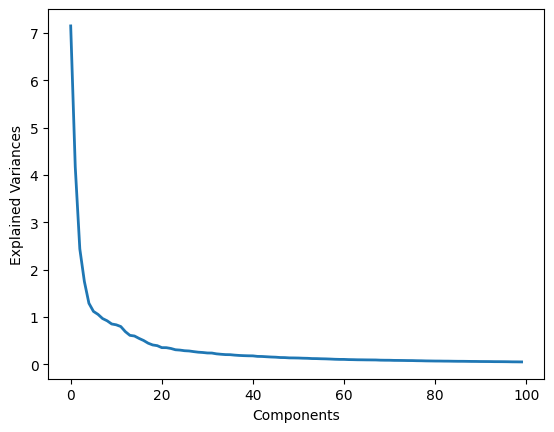

In [ ]:

pca = PCA(n_components=100).fit(data)
plot(pca.explained_variance_, linewidth=2)
xlabel('Components')
ylabel('Explained Variances')  # Corrected spelling
plt.show()  # Corrected function call


In [3]:
pca = PCA(n_components= 75)
pca.fit(data)
merged_data  = pca.transform(data)

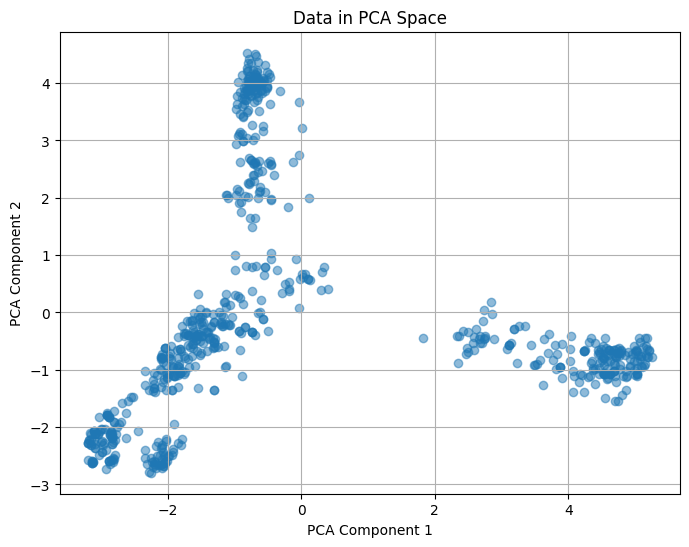

In [ ]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(8, 6))
plt.scatter(merged_data[:, 0], merged_data[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data in PCA Space')
plt.grid(True)
plt.show()

# **hyper tunning svr**

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


yc = y.ravel()

# Define pipeline with SVR
pipeline = RandomForestRegressor(random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Define hyperparameter grid
param_grid = {
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best parameters found:  {'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 30}
SVR Train Set Metrics:
Mean Squared Error: 0.010609866881923627
R2 Score: 0.993980361570007


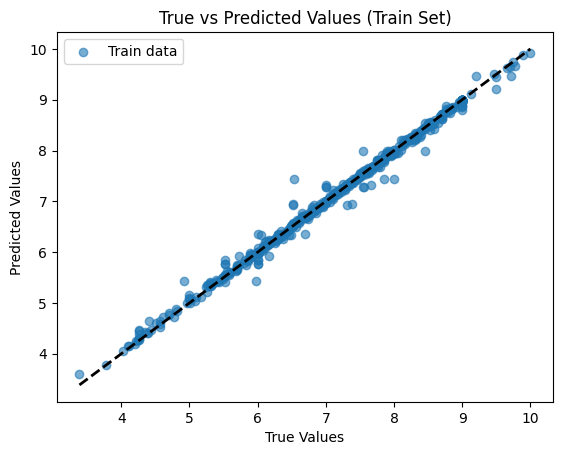


SVR Test Set Metrics:
Mean Squared Error: 0.49134224991416253
R2 Score: 0.6810654001969711


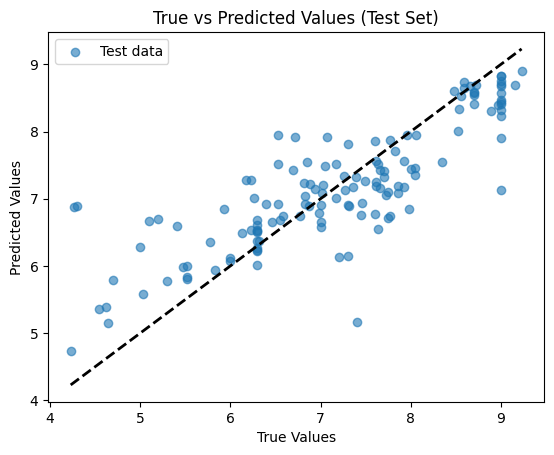

In [6]:

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, predicted_labels_train)
r2_train = r2_score(y_train, predicted_labels_train)
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("SVR Train Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R2 Score:", r2_train)

# Plot true vs. predicted values for training set
plt.figure()
plt.scatter(y_train, predicted_labels_train, label='Train data', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Train Set)')
plt.legend()
plt.show()

# Predictions and metrics for test set
predicted_labels_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, predicted_labels_test)
r2_test = r2_score(y_test, predicted_labels_test)

print("\nSVR Test Set Metrics:")
print("Mean Squared Error:", mse_test)
print("R2 Score:", r2_test)

# Plot true vs. predicted values for test set
plt.figure()
plt.scatter(y_test, predicted_labels_test, label='Test data', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Test Set)')
plt.legend()
plt.show()

# **internal KFOLD cross validation with 5 folds**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the SVR model
model= RandomForestRegressor( bootstrap = False, max_features= 'log2', min_samples_split= 4, n_estimators= 30 , random_state=42)

# Number of splits for KFold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Initialize lists to store evaluation metrics for each fold
metrics = {
    'Fold': [],
    'Train R2': [],
    'Train MSE': [],
    'Train MAE': [],
    'Train MAPE': [],
    'Test R2': [],
    'Test MSE': [],
    'Test MAE': [],
    'Test MAPE': []
}

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data), 1):
    X_train, X_test = merged_data[train_index], merged_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics for this fold
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    # Append metrics for this fold to the metrics dictionary
    metrics['Fold'].append(fold)
    metrics['Train R2'].append(train_r2)
    metrics['Train MSE'].append(train_mse)
    metrics['Train MAE'].append(train_mae)
    metrics['Train MAPE'].append(train_mape)
    metrics['Test R2'].append(test_r2)
    metrics['Test MSE'].append(test_mse)
    metrics['Test MAE'].append(test_mae)
    metrics['Test MAPE'].append(test_mape)

    # Print metrics for training set
    print(f"======== Fold {fold} ======")
    print("Training Set Metrics:")
    print(f'R-Squared: {train_r2}')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

    # Print metrics for testing set
    print("\nTesting Set Metrics:")
    print(f'R-Squared: {test_r2}')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')

# Calculate averages for each metric
average_metrics = {
    'Fold': ['Average'],
    'Train R2': [np.mean(metrics['Train R2'])],
    'Train MSE': [np.mean(metrics['Train MSE'])],
    'Train MAE': [np.mean(metrics['Train MAE'])],
    'Train MAPE': [np.mean(metrics['Train MAPE'])],
    'Test R2': [np.mean(metrics['Test R2'])],
    'Test MSE': [np.mean(metrics['Test MSE'])],
    'Test MAE': [np.mean(metrics['Test MAE'])],
    'Test MAPE': [np.mean(metrics['Test MAPE'])]
}

# Append average metrics to the metrics dictionary
for key in metrics.keys():
    metrics[key].append(average_metrics[key][0])

# Convert metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Export the DataFrame to a CSV file
metrics_df.to_csv('RF_k_fold_metrics.csv', index=False)

print("\nMetrics and averages have been saved to 'k_fold_metrics.csv'")
metrics_df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


======== Fold 1 ======
Training Set Metrics:
R-Squared: 0.9939487336181746
Mean Squared Error (MSE): 0.010665612482360106
Mean Absolute Error (MAE): 0.05221593490554839
Mean Absolute Percentage Error (MAPE): 22.44595183726524

Testing Set Metrics:
R-Squared: 0.6788639235100715
Mean Squared Error (MSE): 0.49473378695386544
Mean Absolute Error (MAE): 0.5130870987739262
Mean Absolute Percentage Error (MAPE): 18.522852813816293


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


======== Fold 2 ======
Training Set Metrics:
R-Squared: 0.9903506530491071
Mean Squared Error (MSE): 0.016631722045660362
Mean Absolute Error (MAE): 0.053266595987972266
Mean Absolute Percentage Error (MAPE): 22.073610780660584

Testing Set Metrics:
R-Squared: 0.655235525027196
Mean Squared Error (MSE): 0.5726779970238788
Mean Absolute Error (MAE): 0.5040293911895828
Mean Absolute Percentage Error (MAPE): 20.80300705377435


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


======== Fold 3 ======
Training Set Metrics:
R-Squared: 0.9921728094849082
Mean Squared Error (MSE): 0.013223225648962658
Mean Absolute Error (MAE): 0.05400026402978873
Mean Absolute Percentage Error (MAPE): 21.896049464767735

Testing Set Metrics:
R-Squared: 0.7279490067746217
Mean Squared Error (MSE): 0.49648158648161084
Mean Absolute Error (MAE): 0.5186406894029294
Mean Absolute Percentage Error (MAPE): 20.69565287132069


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


======== Fold 4 ======
Training Set Metrics:
R-Squared: 0.9886061479249396
Mean Squared Error (MSE): 0.01984366762992269
Mean Absolute Error (MAE): 0.06216972533696494
Mean Absolute Percentage Error (MAPE): 22.391343458269265

Testing Set Metrics:
R-Squared: 0.7034139265050656
Mean Squared Error (MSE): 0.47002939412326916
Mean Absolute Error (MAE): 0.49666418141597823
Mean Absolute Percentage Error (MAPE): 18.688644541505557


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


======== Fold 5 ======
Training Set Metrics:
R-Squared: 0.990427819821174
Mean Squared Error (MSE): 0.01597486699991381
Mean Absolute Error (MAE): 0.058933309822343884
Mean Absolute Percentage Error (MAPE): 21.734258242794606

Testing Set Metrics:
R-Squared: 0.7686921575851413
Mean Squared Error (MSE): 0.4421669763920427
Mean Absolute Error (MAE): 0.4846166170235293
Mean Absolute Percentage Error (MAPE): 20.947083183333934

Metrics and averages have been saved to 'k_fold_metrics.csv'


,Fold,Train R2,Train MSE,Train MAE,Train MAPE,Test R2,Test MSE,Test MAE,Test MAPE
0,1,0.993949,0.010666,0.052216,22.445952,0.678864,0.494734,0.513087,18.522853
1,2,0.990351,0.016632,0.053267,22.073611,0.655236,0.572678,0.504029,20.803007
2,3,0.992173,0.013223,0.054000,21.896049,0.727949,0.496482,0.518641,20.695653
3,4,0.988606,0.019844,0.062170,22.391343,0.703414,0.470029,0.496664,18.688645
4,5,0.990428,0.015975,0.058933,21.734258,0.768692,0.442167,0.484617,20.947083
5,Average,0.991101,0.015268,0.056117,22.108243,0.706831,0.495218,0.503408,19.931448


# **Saving the model **